# __Humidity Predictor__

In [53]:
import glob, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Training files
files = glob.glob('../data/WHT_data/WHT_weather_set_parts_*')
files = sorted(files)
WHT_parts = [pd.read_csv(file_path) for file_path in files]

# Concatenate the DataFrames into a single training set
WHT_data = pd.concat(WHT_parts, ignore_index=True)

/tmp/ipykernel_11188/3604653322.py:6: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_11188/3604653322.py:6: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_11188/3604653322.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_11188/3604653322.py:6: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_11188/3604653322.py:6: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for fi

In [54]:
WHT_data['sampletime'] = pd.to_datetime(WHT_data['sampletime'])

# Extract year
WHT_data['year'] = WHT_data['sampletime'].dt.year

# Extract month
WHT_data['month'] = WHT_data['sampletime'].dt.month

# Extract day
WHT_data['day'] = WHT_data['sampletime'].dt.day

# Extract hour
WHT_data['hour'] = WHT_data['sampletime'].dt.hour

# Extract minute
WHT_data['minute'] = WHT_data['sampletime'].dt.minute

# Extract second
WHT_data['second'] = WHT_data['sampletime'].dt.second

# Drop the 'sampletime' column
WHT_data.drop(columns=['sampletime'], inplace=True)

WHT_data.head()

,windspeed,airtemperature,relativehumidity,localwetness,localbattery,winddirection,airpressure,dewpoint,year,month,day,hour,minute,second
0,7.1742,9.3159,32.342,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,31
1,6.7829,9.322,32.324,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,37
2,7.0003,9.3159,32.36,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,43
3,7.2612,9.3159,32.434,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,49
4,6.9134,9.3159,32.489,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,55


In [55]:
# Convert the numeric values into float32
# We need to convert each category into float32
columns = WHT_data.columns

# There are some missing values with '\\N' in the variables. Let's transform into an arbitrary number
for ii in columns:
    WHT_data[ii][WHT_data[ii] == '\\N'] = -1
    # Converting into float32
    WHT_data[ii] = WHT_data[ii].astype('float32')

# Displaying the type of each column
print(WHT_data.dtypes)
print('\n')

# Now we can count the number of NaNs in each category
print(WHT_data.isna().sum())

/tmp/ipykernel_11188/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_11188/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_11188/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_11188/2924672293.py:7: SettingWithCopyWarning: 
A

windspeed           float32
airtemperature      float32
relativehumidity    float32
localwetness        float32
localbattery        float32
winddirection       float32
airpressure         float32
dewpoint            float32
year                float32
month               float32
day                 float32
hour                float32
minute              float32
second              float32
dtype: object


windspeed                 0
airtemperature            0
relativehumidity          0
localwetness        6334884
localbattery        6334884
winddirection       5557582
airpressure         5557582
dewpoint            5557582
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64


/tmp/ipykernel_11188/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_11188/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_11188/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_11188/2924672293.py:7: SettingWithCopyWarning: 
A

In [56]:
# Deleting the columns with more than 30% of NaNs

dim = len(WHT_data) # Dimension of the DataFrame

for ii in columns:
    nans = WHT_data[ii].isna().sum()*100/dim
    # Applying the condition over the column
    if nans > 30:
        WHT_data.drop(ii, axis=1, inplace=True)

In [45]:
#def split_and_save(set, name, num_parts = 4):
    # Splitting the dataset set into n-parts
#    split_indices = [i * len(set) // num_parts for i in range(1, num_parts)]
#    tt_set_parts = np.split(set, split_indices)
    
    # Saving each part into a separate file
#    for i, part in enumerate(tt_set_parts):
#        part.to_csv(f'../data/data_cleaned/{name}_set_parts_{i + 1}.csv', index=False)

#split_and_save(WHT_data, 'cleaned_forecast', num_parts = 15)

In [57]:
# Constraining to data from 2023 till 2024
WHT_data = WHT_data[(WHT_data.year >= 2023) & (WHT_data.year < 2024)]

## Data Visualization

#### Mean temperature, humidity and wind speed by month

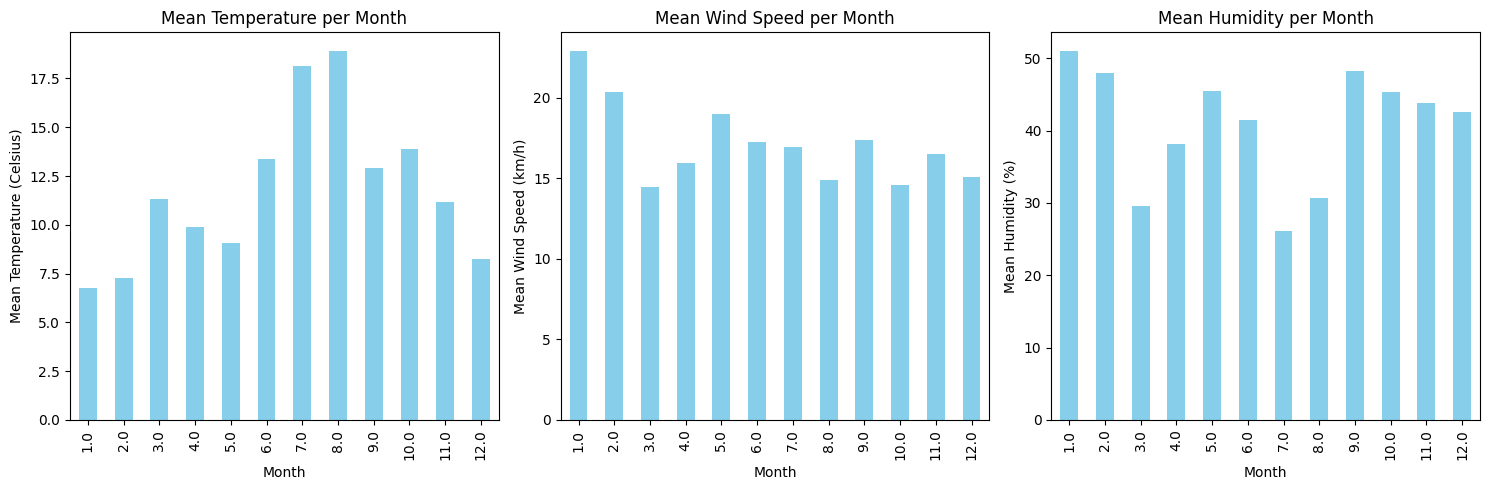

In [20]:
# Group by month and calculate mean temperature
mean_temp_per_month = WHT_data.groupby('month')['airtemperature'].mean()
mean_wind_per_month = WHT_data.groupby('month')['windspeed'].mean()
mean_humi_per_month = WHT_data.groupby('month')['relativehumidity'].mean()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

# Plotting the mean temperature per month
mean_temp_per_month.plot(kind='bar', color='skyblue', ax=ax[0])
mean_wind_per_month.plot(kind='bar', color='skyblue', ax=ax[1])
mean_humi_per_month.plot(kind='bar', color='skyblue', ax=ax[2])

ax[0].set_title('Mean Temperature per Month'); ax[1].set_title('Mean Wind Speed per Month'); ax[2].set_title('Mean Humidity per Month')
ax[0].set_xlabel('Month'); ax[1].set_xlabel('Month'); ax[2].set_xlabel('Month')
ax[0].set_ylabel('Mean Temperature (Celsius)'); ax[1].set_ylabel('Mean Wind Speed (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Correlation map

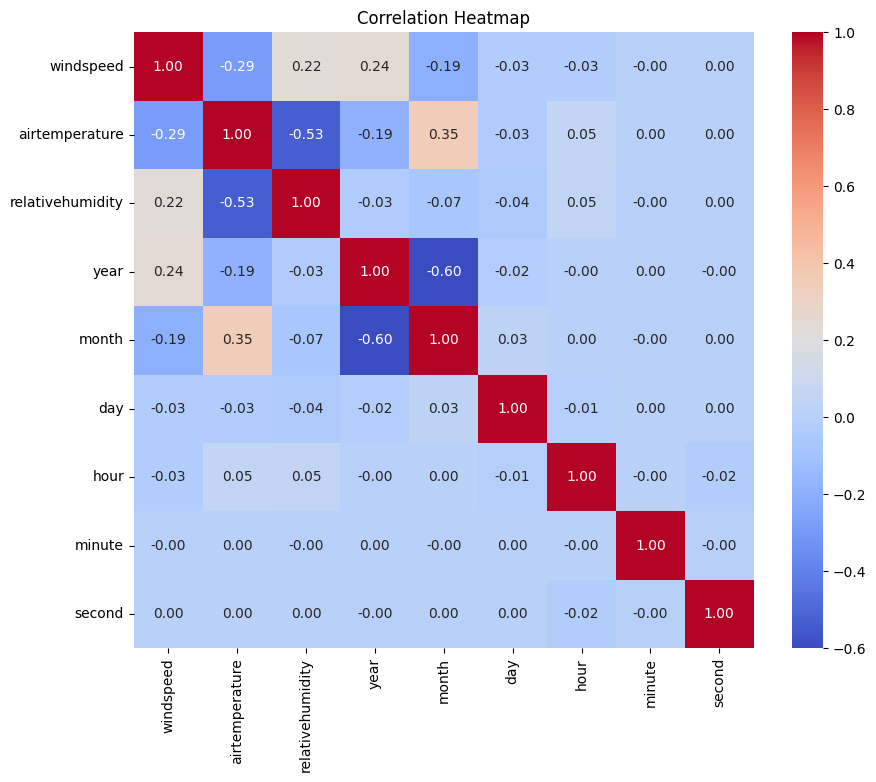

In [21]:
# Assuming combined is your DataFrame
correlation_matrix = WHT_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Discarding the variables with very small correlation close to 0 (or equal to 0)
WHT_data.drop(['second', 'minute'], axis=1, inplace=True)

## Neural Network model

### Training and testing sets

In [23]:
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
target = WHT_data.relativehumidity # Target variable
data   = WHT_data.drop(columns='relativehumidity') # Array of features

# We dummify the year, day, month and hour so first we need to convert the variables into integers
cols_to_int = ['hour', 'day', 'month', 'year']
data[cols_to_int] = data[cols_to_int].astype('int32')

# Convert the columns into variable dummies
data = pd.get_dummies(data, columns=cols_to_int)

# Identificar las columnas de tipo bool
bool_cols = data.select_dtypes(include=['bool']).columns

# Convertir las columnas de tipo bool a int32
data[bool_cols] = data[bool_cols].astype('int32')

In [30]:
# Scaling numerical columns
cols_to_scale = ['airtemperature', 'windspeed']

# Calling the MinMax scaler transformation
scaler = preprocessing.MinMaxScaler()

# Rescaling the columns
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state= 101)

### Dense Neural Network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Design the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Re-scaling also the target variable for performance imrpovements
# Crear y ajustar el MinMaxScaler para la variable objetivo
scaler_y = preprocessing.MinMaxScaler()

# Training set
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train the model
history = model.fit(X_train, y_train_scaled, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test_scaled)
print("Mean Squared Error (MSE):", loss)
print("Mean Absolute Error (MAE):", mae)

Epoch 1/20
31658/31658 [==============================] - 46s 1ms/step - loss: 0.0039 - mae: 0.0396 - val_loss: 0.0020 - val_mae: 0.0295
Epoch 2/20
31658/31658 [==============================] - 25s 798us/step - loss: 0.0017 - mae: 0.0268 - val_loss: 0.0015 - val_mae: 0.0238
Epoch 3/20
31658/31658 [==============================] - 25s 800us/step - loss: 0.0015 - mae: 0.0245 - val_loss: 0.0015 - val_mae: 0.0250
Epoch 4/20
31658/31658 [==============================] - 25s 805us/step - loss: 0.0014 - mae: 0.0234 - val_loss: 0.0013 - val_mae: 0.0224
Epoch 5/20
31658/31658 [==============================] - 26s 834us/step - loss: 0.0013 - mae: 0.0226 - val_loss: 0.0012 - val_mae: 0.0214
Epoch 6/20
31658/31658 [==============================] - 27s 852us/step - loss: 0.0012 - mae: 0.0221 - val_loss: 0.0012 - val_mae: 0.0207
Epoch 7/20
31658/31658 [==============================] - 25s 803us/step - loss: 0.0012 - mae: 0.0217 - val_loss: 0.0012 - val_mae: 0.0218
Epoch 8/20
31658/31658 [=====

9894/9894 [==============================] - 4s 446us/step
R-squared (R2): 0.9870796455448203


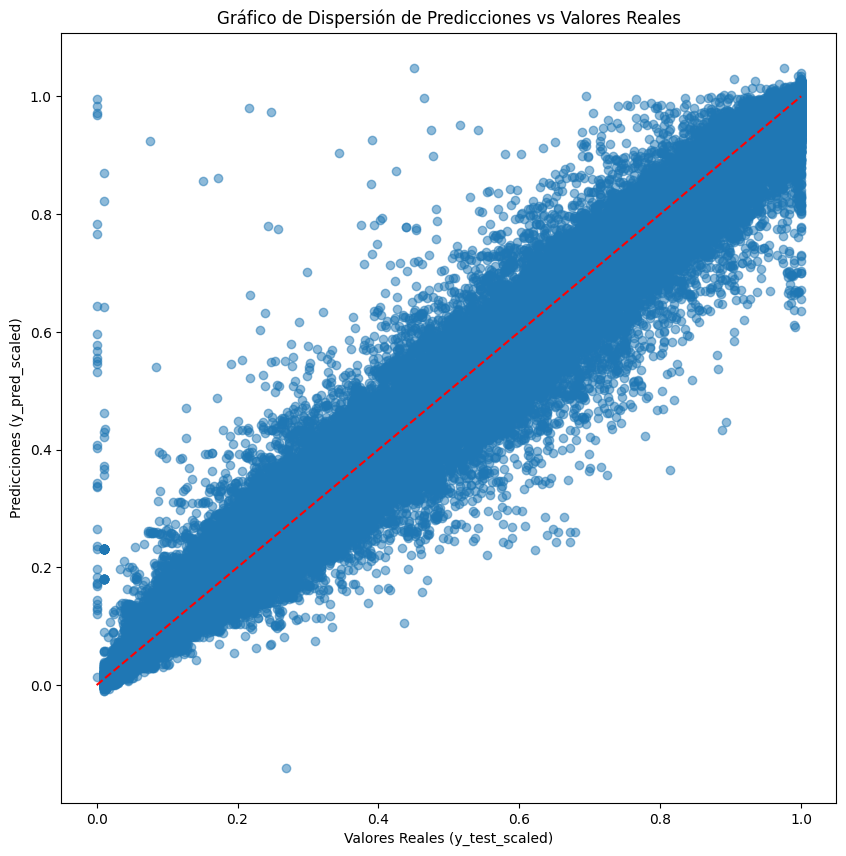

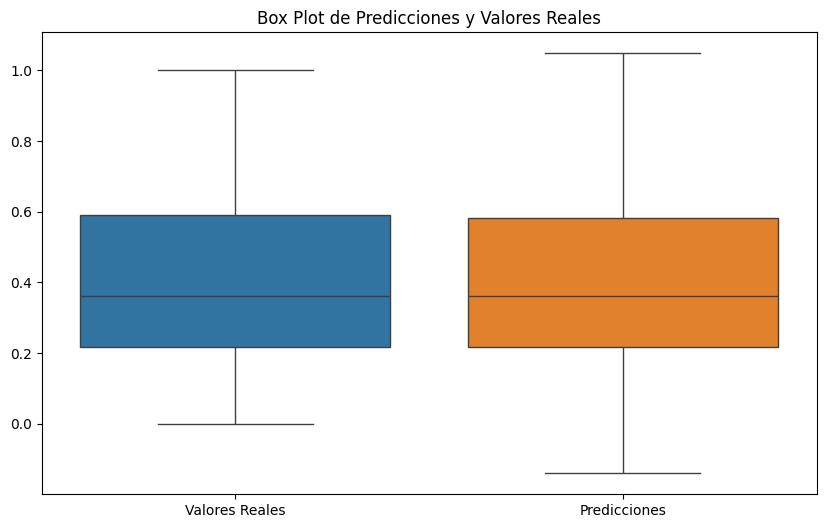

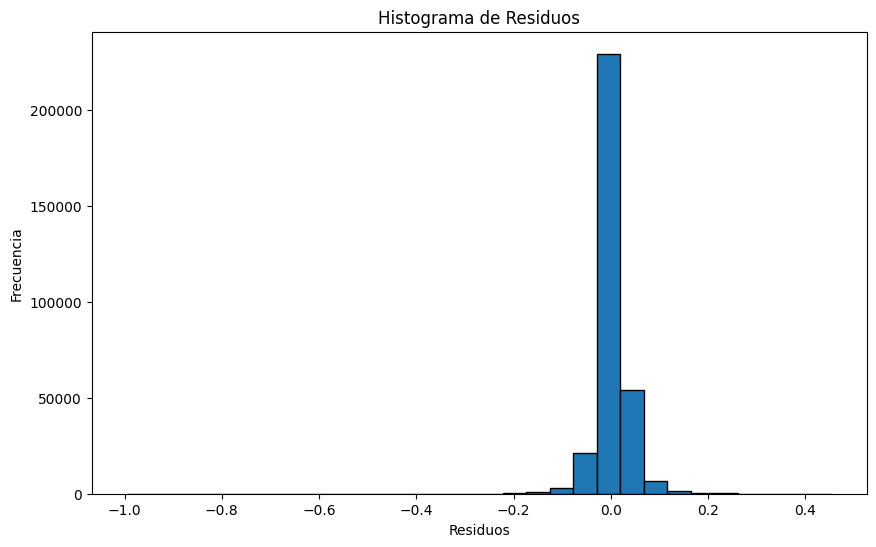

In [49]:
# Applying the DNN over the testing set
y_pred = model.predict(X_test)

# Calculate R-squared (R2)
r2 = r2_score(y_test_scaled, y_pred)
print("R-squared (R2):", r2)

# Gráfico de dispersión
plt.figure(figsize=(10,10))
plt.scatter(y_test_scaled, y_pred, alpha=0.5)
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', linestyle='--')
plt.xlabel('Valores Reales (y_test_scaled)')
plt.ylabel('Predicciones (y_pred_scaled)')
plt.title('Gráfico de Dispersión de Predicciones vs Valores Reales')
plt.show()

# Boxplot de datos predecidos vs datos reales
import seaborn as sns

# Crear un DataFrame para las comparaciones
df_comparacion = pd.DataFrame({
    'Valores Reales': y_test_scaled.flatten(),
    'Predicciones': y_pred.flatten()
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_comparacion)
plt.title('Box Plot de Predicciones y Valores Reales')
plt.show()

residuos = y_test_scaled - y_pred

# Histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

## Time Series

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime, joblib
import statsmodels.api as sm
from itertools import product

In [58]:
# Usamos solo los datos desde 2023
data = WHT_data[(WHT_data.year >= 2023) & (WHT_data.year < 2024)]

# Convierte las columnas a tipo entero
data[['year', 'month', 'day', 'hour', 'minute', 'second']] = data[['year', 'month', 'day', 'hour', 'minute', 'second']].astype(int)

# Crea la nueva columna datetime
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute', 'second']])

# Elimina las columnas originales si ya no son necesarias
data = data.drop(columns=['year', 'month', 'day', 'hour', 'minute', 'second'])

# Opcional: reordena las columnas para tener datetime al principio
cols = ['datetime'] + [col for col in data.columns if col != 'datetime']
data = data[cols]

# Dado que vamos a calcular series temporales de humedad, eliminamos las columnas windspeed y airtemperature
data.drop(['windspeed', 'airtemperature'], axis=1, inplace=True)

# Eliminamos los NaNs, si los hubiera
data['relativehumidity'].dropna(inplace=True)

# Convertimos datetime a index
data.index = data.datetime

# Eliminamos la columna datetime
data.drop('datetime', axis=1, inplace=True)

print(data.head())

                     relativehumidity
datetime                             
2023-01-01 00:00:40         86.900002
2023-01-01 00:01:10         86.500000
2023-01-01 00:01:40         86.800003
2023-01-01 00:02:10         86.800003
2023-01-01 00:02:40         86.099998


### Humidity representation

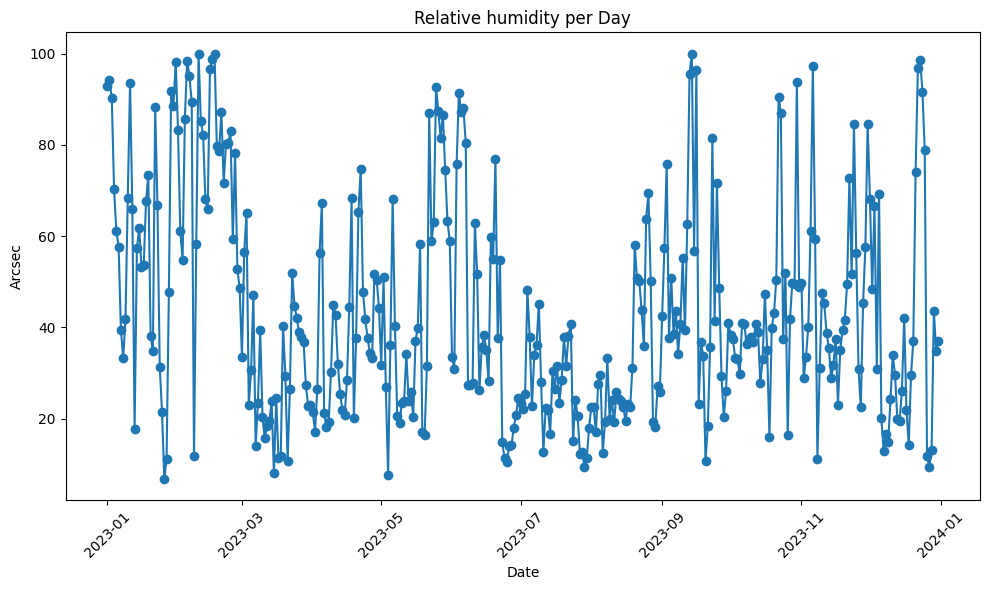

In [20]:
# Resample para agrupar los datos por semana y calcular la media
data_weekly = data.resample('D').mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_weekly.index, data_weekly['relativehumidity'], marker='o')
plt.xlabel('Date')
plt.ylabel('Arcsec')
plt.title('Relative humidity per Day')
plt.xticks(rotation=45)  # Rotar las fechas para que sean legibles
plt.tight_layout()
plt.show()

### 1. Resampling of the time series

In [50]:
# Resamplear los datos a intervalos de 10 minutos (puedes ajustar esto según tus necesidades)
data_resampled = data.resample('10T').mean()

# Establecemos la frecuencia
data_resampled = data_resampled.asfreq('10T')

# Eliminamos los posibles NaN
data_resampled.dropna(inplace = True)

### 2. Seasonal decomposition

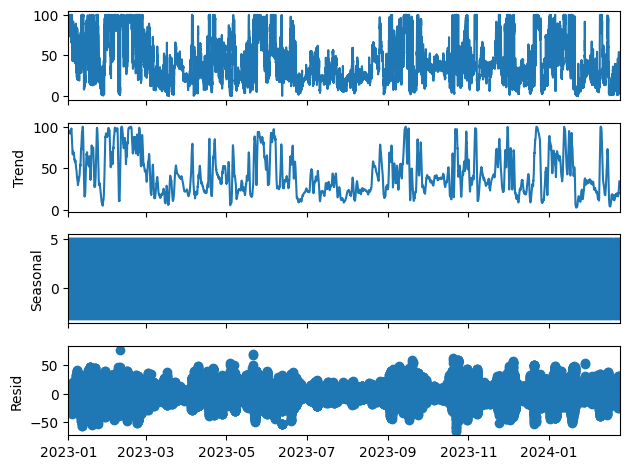

In [10]:
# Descomposición aditiva

# Elgimos un periodo de 144 dado que la función está resampleada cada 10 minutos, y queremos observaro la variación diaria, esto sería
# 1 día = 24 horas x 60 minutos / 10 minutos = 144

result = seasonal_decompose(data_resampled, model='additive', period=144)

# Graficar los componentes de la descomposición
result.plot()
plt.show()

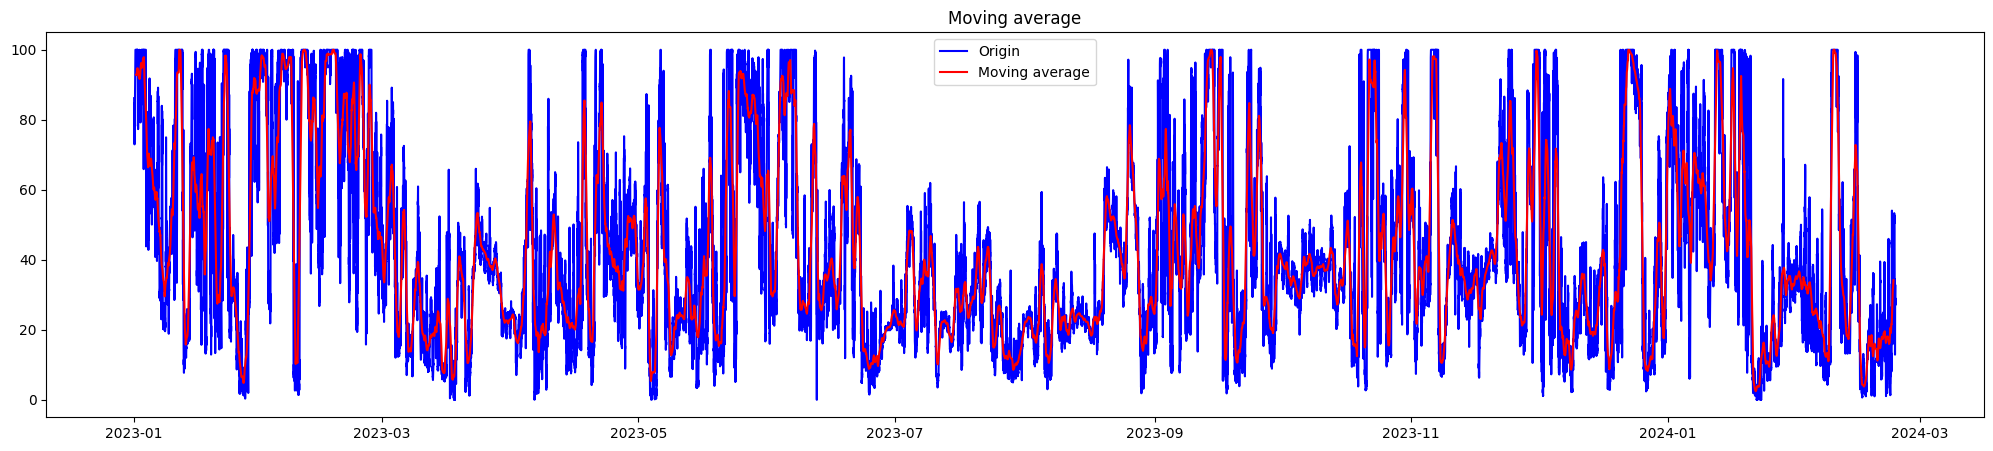

In [14]:
#We have a seasonality of period 12
data_resampled_ma = data_resampled.rolling(window = 144, center = True).mean()
#Series display
plt.figure(figsize=(25,5))
plt.plot(data_resampled, color = 'blue', label = 'Origin')
plt.plot(data_resampled_ma, color = 'red', label = 'Moving average')
plt.legend()
plt.title('Moving average')
plt.show()

### 3. Autocorrelation (ACF) and Partial Autocorrelation (PACF) of the time series

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

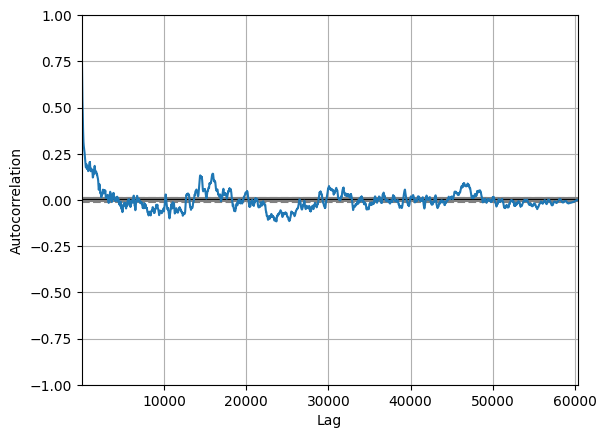

In [23]:
# First, we plot a correlation map
pd.plotting.autocorrelation_plot(data_resampled)

<Figure size 1400x600 with 0 Axes>

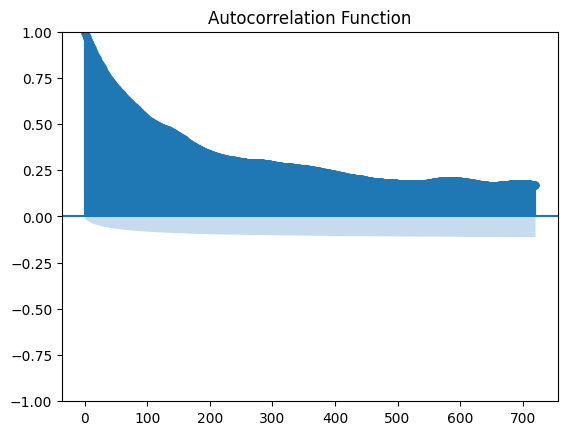

<Figure size 1400x600 with 0 Axes>

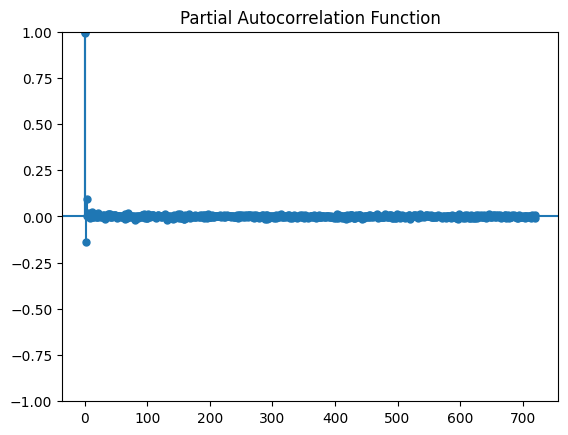

In [32]:
import statsmodels.graphics.tsaplots as tsaplots

# Graficar la función de autocorrelación (ACF)
plt.figure(figsize=(14, 6))
acf = tsaplots.plot_acf(data_resampled.dropna(), lags=144*5, title='Autocorrelation Function')
plt.show()

# Graficar la función de autocorrelación parcial (PACF)
plt.figure(figsize=(14, 6))
pacf = tsaplots.plot_pacf(data_resampled.dropna(), lags=144*5, title='Partial Autocorrelation Function')
plt.show()

The ACF shows a gradual decay towards 0 whereas the PACF exibits a clear cut-off after p=5. It looks like our time series follows an $AR(p)$ process.

### 4. AutoRegressive process $AR(p)$

In [51]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo AR(p) con el orden p determinado
p = 3
model_ar = ARIMA(data_resampled, order=(p, 0, 0)).fit()

# Resumen del modelo
print(model_ar.summary())

/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       relativehumidity   No. Observations:                52553
Model:                 ARIMA(3, 0, 0)   Log Likelihood             -141427.721
Date:                Thu, 18 Jul 2024   AIC                         282865.443
Time:                        10:26:29   BIC                         282909.791
Sample:                             0   HQIC                        282879.303
                              - 52553                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3744      2.178     19.913      0.000      39.105      47.644
ar.L1          1.1359      0.002    748.843      0.000       1.133       1.139
ar.L2         -0.2374      0.002   -104.213      0.0

#### Validating the model

##### a) Residuals analysis

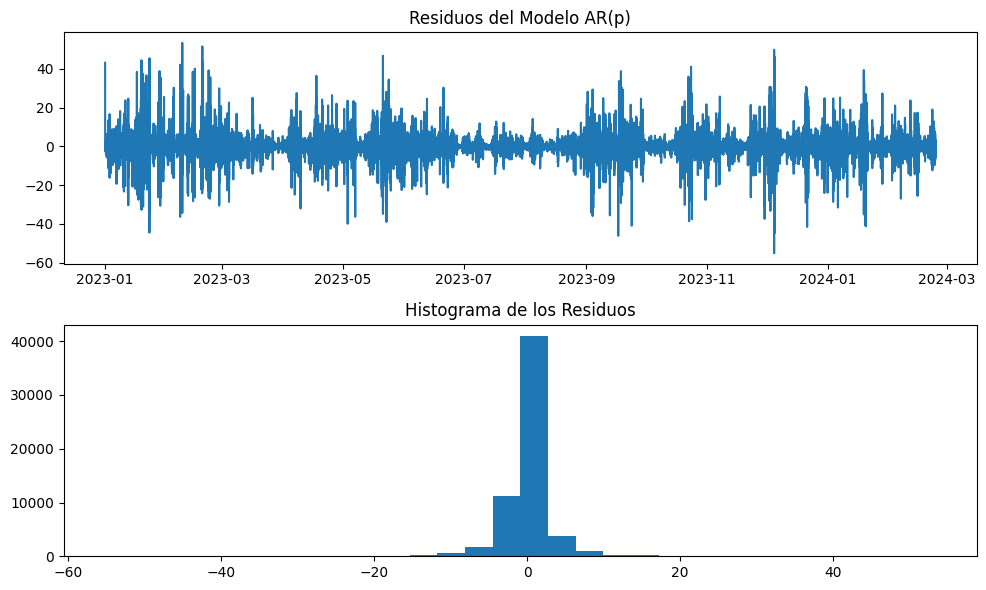

In [68]:
# Graficar los residuos
residuals = model_ar.resid
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuos del Modelo AR(p)')
plt.subplot(2, 1, 2)
plt.hist(residuals, bins=30)
plt.title('Histograma de los Residuos')
plt.tight_layout()
plt.show()

##### b) Checking the stationarity of the residuals

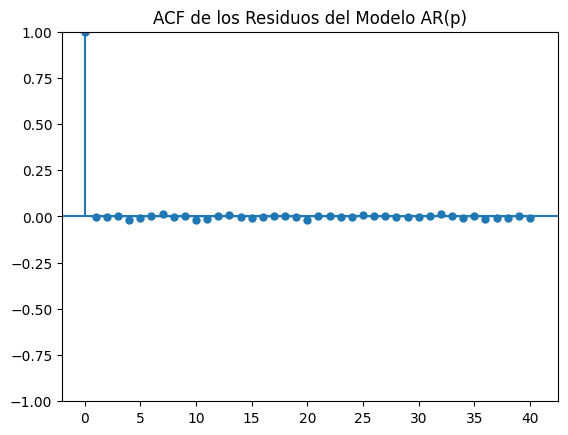

In [69]:
# ACF de los residuos para verificar que no quedan patrones
plot_acf(residuals, lags=40)
plt.title('ACF de los Residuos del Modelo AR(p)')
plt.show()

##### c) Checking the Normality and Homoestasicity

In [70]:
from statsmodels.stats.diagnostic import acorr_lm

# Test de Ljung-Box para los residuos
lb_test = acorr_lm(model_ar.resid)
print(f'Ljung-Box test statistic: {lb_test[0]}')
print(f'p-value: {lb_test[1]}')

# Prueba de normalidad de residuos (Shapiro-Wilk Test)
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {stat}')
print(f'p-value: {p_value}')

Ljung-Box test statistic: 63.532716012901986
p-value: 7.728039329027227e-10
Shapiro-Wilk test statistic: 0.7030190229415894
p-value: 0.0


/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Forecast prediction

/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


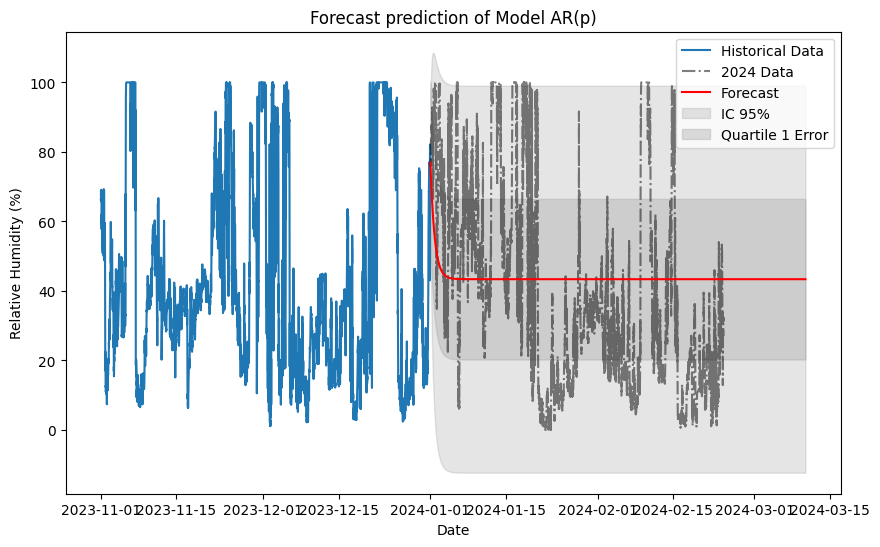

In [67]:
# Realizar pronósticos
steps = 10000
forecast = model_ar.get_forecast(steps=steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Crear una nueva serie temporal para las predicciones
forecast_index = pd.date_range(start=data_resampled.index[-1], periods=steps + 1, freq='10T')[1:]
forecast_series = pd.Series(forecast_mean.values, index=forecast_index)
forecast_lower_series = pd.Series(forecast_ci['lower relativehumidity'].values, index=forecast_index)
forecast_upper_series = pd.Series(forecast_ci['upper relativehumidity'].values, index=forecast_index)

# Seleccionar el último periodo de datos históricos desde 2024-01 en adelante
data_recent = data_resampled['2023-11':]

# Calcular los errores del pronóstico
# Aseguramos que forecast_mean y data_recent tienen la misma longitud para la resta
if len(data_recent) < steps:
    historical_steps = len(data_recent)
else:
    historical_steps = steps

# Alinear los índices para que la resta sea válida
aligned_forecast_mean = forecast_mean[:historical_steps].values
aligned_data_recent = data_recent.iloc[:historical_steps]['relativehumidity'].values
errors = aligned_data_recent - aligned_forecast_mean

# Calcular el cuartil 1 de los errores
q1 = np.quantile(errors, 0.25)

# Crear el área de cuartil 1 para graficar
forecast_q1_lower = forecast_series - q1
forecast_q1_upper = forecast_series + q1

# Graficar los datos históricos recientes y las predicciones con el intervalo de confianza
plt.figure(figsize=(10, 6))
plt.plot(data_recent, label='Historical Data')
plt.plot(data_aux['2024-01-01':], 'k-.', label='2024 Data',alpha=0.5)
plt.plot(forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_lower_series, forecast_upper_series, color='gray', alpha=0.2, label='IC 95%')
plt.fill_between(forecast_index, forecast_q1_lower, forecast_q1_upper, color='darkgray', alpha=0.4, label='Quartile 1 Error')
plt.title('Forecast prediction of Model AR(p)')
plt.xlabel('Date'); plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()